$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 6: Neural Networks

Prashant Kumar Thakur

## Overview

The following functions were defined as per the instruction. The code is refered from Professor's Lecture.

In [1]:
# Replace this cell with several cells defining the above functions.
import numpy as np
import neuralnetworks as nn
import mlutils as ml
import time


def trainNNs(X, T,trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False):
    results = []

    # Do tasks here
    for h_layer in hiddenLayerStructures:
        start = time.time()
        train_result = []
        test_result = []
        for repetition in range(numberRepetitions):
            Xtrain, Ttrain, Xtest, Ttest = ml.partition(X,T,(trainFraction,1-trainFraction),classification=classify)
            if classify:
                nnet = nn.NeuralNetworkClassifier(X.shape[1],h_layer, len(np.unique(Tanuran)))
                nnet.train(Xtrain,Ttrain,numberIterations)
                pTrain, probsTrain, _ = nnet.use(Xtrain, allOutputs=True)
                pTest, probsTest, _ = nnet.use(Xtest, allOutputs=True)  # discard hidden unit outputs
                train_result.append(1-ml.percentCorrect(pTrain,Ttrain)/100)
                test_result.append(1-ml.percentCorrect(pTest,Ttest)/100)


            else:
                nnet = nn.NeuralNetwork(X.shape[1],h_layer, T.shape[1])
                nnet.train(Xtrain,Ttrain,numberIterations)
                Ytrain = nnet.use(Xtrain)
                Ytest = nnet.use(Xtest)
                trn_rmse = np.sqrt(np.mean((Ytrain - Ttrain) ** 2))
                tst_rmse = np.sqrt(np.mean((Ytest - Ttest) ** 2))
                train_result.append(trn_rmse)
                test_result.append(tst_rmse)

#             if repetition == (numberRepetitions-1):
        total_time = time.time()-start
        results.append([h_layer, train_result, test_result, total_time])


    # End tasks

    # print(results)
    return results


def summarize(results):
    output = []
    for val in results:
        output.append([val[0],np.mean(val[1]),np.mean(val[2]),val[-1]])
    return output


def bestNetwork(summaries):
    val = np.array(summaries,dtype=object) # dtype object handles the list as an element in the hidden layer.
    idx = np.argmin(val[:,2])
    return summaries[idx]


## Examples


In [2]:
import numpy as np
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))
X.shape,T.shape

((10, 1), (10, 1))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

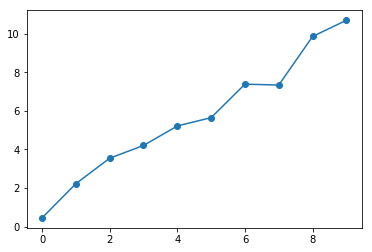

In [4]:
plt.plot(X, T, 'o-');

In [5]:
import neuralnetworks as nn
nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 5)
nnet.getErrorTrace()

array([ 0.70710678,  0.20848856,  0.15047541,  0.14722697,  0.14577401,
        0.13862664])

In [6]:
nnet = nn.NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)


NeuralNetwork(1, [5, 5, 5], 1)
   Network was trained for 101 iterations. Final error is 0.10865944372394622.

In [8]:
result = trainNNs(X, T, 0.8, [0, 10, [10, 10], [5, 5], [20,20],100,[50,50],20,200,[5,5,5]], 50, 400, classify=False)

In [10]:
summarize(result)

[[0, 0.45607967002822031, 0.50628672348368464, 0.02831864356994629],
 [10, 0.025089506151798804, 1.4542267877068873, 3.168412446975708],
 [[10, 10], 0.026276469366545027, 1.2917502689591902, 4.540322780609131],
 [[5, 5], 0.039223080834405108, 1.2877005736780773, 4.24870228767395],
 [[20, 20], 0.01563430341068632, 1.2942893119759367, 5.590377569198608],
 [100, 0.096335271707077869, 1.3571137481605162, 5.263269424438477],
 [[50, 50], 0.011001320078206402, 1.2201153594981049, 9.55197525024414],
 [20, 0.03940522712448568, 1.7197773874417115, 3.5008766651153564],
 [200, 0.13866265710428785, 1.1304555850984896, 7.105364799499512],
 [[5, 5, 5], 0.11468253278292675, 1.409980938984942, 5.115255832672119]]

In [11]:
best = bestNetwork(summarize(result))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

[0, 0.45607967002822031, 0.50628672348368464, 0.02831864356994629]
Hidden Layers 0 Average RMSE Training 0.46 Testing 0.51 Took 0.03 seconds


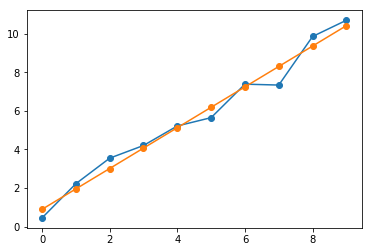

In [17]:
nnet = nn.NeuralNetwork(X.shape[1], 0, T.shape[1])
nnet.train(X, T, 100)
pTest = nnet.use(X)
plt.plot(X, T, 'o-');
plt.plot(X, pTest, 'o-');


The hidden layer 0 is the best fit for this case  as the model is linear and the hidden layer 0 maps the input to output with better.

## Data for Regression Experiment

From the UCI Machine Learning Repository, the file was downloaded Appliances energy prediction data.

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

The following section reads the data in numpy using loadtxt as instructed.

In [49]:
filename='energydata_complete.csv'
fp = open(filename,'r')
header = fp.readline()

names = [h.strip('"') for h in header.split(',')[1:-2]] # Ignore first item and the last two items.
data = np.loadtxt(fp ,delimiter=',', usecols=1 + np.arange(26),dtype=str)
data = np.chararray.strip(data,"\" ")
data = np.array(data).astype(float)
Tenergy = data[:,:2]
Xenergy = data[:,2:]
Xnames = names[2:]
Tnames = names[:2]

In [50]:
names

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [38]:
data.shape

(19735, 26)

Use the first two columns, labelled `Appliances` and `lights` as the target variables, and the remaining 24 columns as the input features.  So

In [40]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [41]:
Xnames

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [42]:
Tnames

['Appliances', 'lights']

The following section explores different hidden layers. Also the iteration test has been done to find the best iteration and then the best network was used to find the prediction.

In [ ]:
results = trainNNs(Xenergy, Tenergy, 0.8, [50,200,100,[50,50],50,20,[10,10,10],[15,15],0,[20,10]], 5, 1000)

In [68]:
summarize(results)

[[50, 61.534378527022923, 63.988583283249014, 157.7544240951538],
 [200, 61.638386894110248, 62.459632485580983, 493.69926142692566],
 [100, 61.338361880391446, 62.422708792487185, 271.11178398132324],
 [[50, 50], 62.20828293951854, 62.544466797409918, 300.12203192710876],
 [50, 61.980513489897724, 62.934594251470891, 159.5940375328064],
 [20, 63.15767819334387, 64.102976243377185, 69.59270644187927],
 [[10, 10, 10], 63.16819626503591, 64.352497857832773, 94.9483916759491],
 [[15, 15], 61.97046683675417, 64.077516871107719, 102.3609893321991],
 [0, 67.276653175232553, 66.721153396975836, 1.746995210647583],
 [[20, 10], 61.474490436766544, 63.917506471160593, 80.82105016708374]]

In [69]:
bestNetwork(summarize(results))

[100, 61.338361880391446, 62.422708792487185, 271.11178398132324]

In [71]:
Xtrain,Ttrain,Xtest,Ttest = ml.partition(Xenergy,Tenergy,(0.8,0.2),classification=False) 
Xtest.shape

(3947, 24)

0.578017651596
0.47809918832
0.442204468909
0.418316332709
0.411443298192


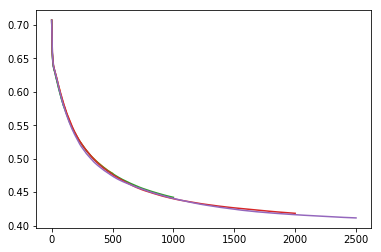

In [72]:
iteration = [100,500,1000,2000,2500]
for i in iteration:
    nnet = nn.NeuralNetwork(Xenergy.shape[1],100,Tenergy.shape[1])
    nnet.train(Xtrain,Ttrain,i)
    error = nnet.getErrorTrace()
    print(error[-1])
    plt.plot(error);

Based on the error trace, the iteration is set to 2000 as increasing the number higer was similar. The last error value given by different iteration for 2000 and 2500 is similar so it was selected for the further testing.

0.414109200078


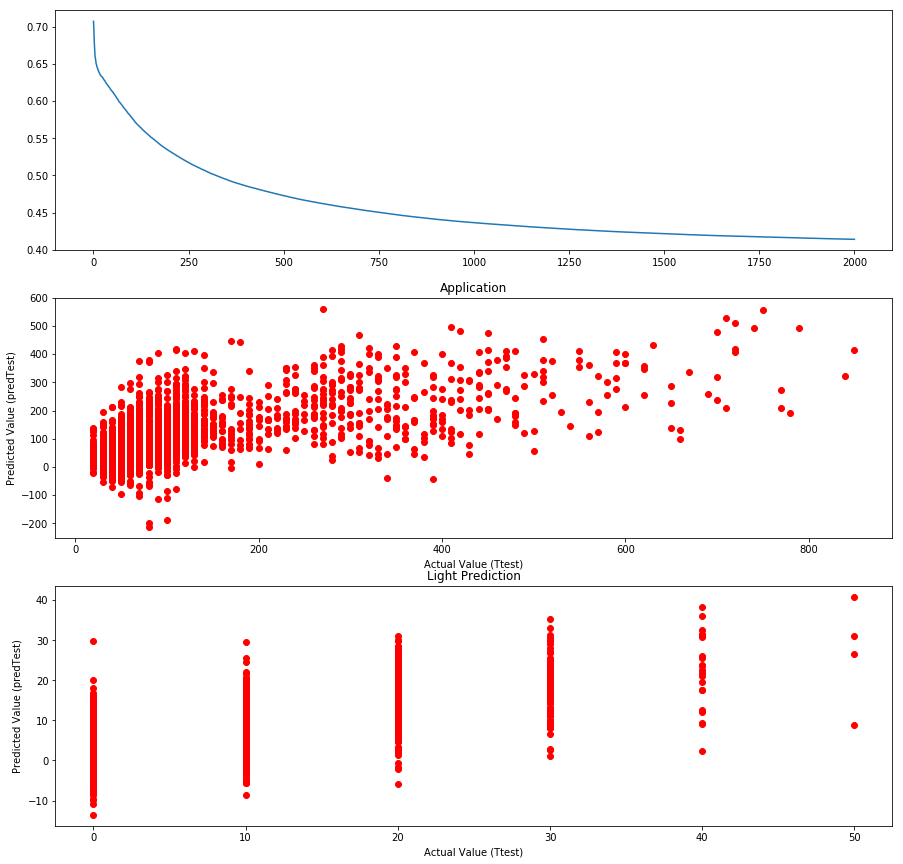

In [73]:
plt.figure(figsize=(15,15))
nnet = nn.NeuralNetwork(Xenergy.shape[1],100,Tenergy.shape[1])
nnet.train(Xtrain,Ttrain,2000)
error = nnet.getErrorTrace()
print(error[-1])
plt.subplot(3,1,1)
plt.plot(error);
pTest = nnet.use(Xtest)
plt.subplot(3,1,2)
plt.xlabel("Actual Value (Ttest)")
plt.ylabel("Predicted Value (predTest)")
plt.title("Application")
plt.plot(Ttest[:,0],pTest[:,0],'ro')
plt.subplot(3,1,3)
plt.xlabel("Actual Value (Ttest)")
plt.ylabel("Predicted Value (predTest)")
plt.title("Light Prediction")
plt.plot(Ttest[:,1],pTest[:,1],'ro')

Out of 10 different hidden layer structures, 100 was found to work best. Larger number of layer can cause the data to over-fitting because of which the test data doesn't perform better. 

The application and light value for test actual value and predicted value was plotted above. The actual value is on x-axis and the predicted value is on y-axis. The first figure shows the predicted value is on a 45 degree line which show that most of the predicted data is on the actual line. There is some scatter which shows the prediction has some error.

Similarly, the predicted value for the light is discerete and the graph is discrete in nature as well.


## Data for Classification Experiment

From the UCI Machine Learning Repository, download the [Anuran Calls (MFCCs)](http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29) data. 

!wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
!unzip Anuran*zip


The data was read from the csv file as instructed.

In [23]:
import numpy as np
filename = 'Frogs_MFCCs.csv'
fp = open(filename,'r')
header = [val.replace(" ", "") for val in fp.readline().split(',')]
data = np.loadtxt(fp ,delimiter=',', usecols=1 + np.arange(25),dtype=str)
# Xnames = names[2:]
# Tnames = names[:2]
data[:3,:]
Xanuran = data[:,:21]
Xanuran = np.array(Xanuran).astype(float)
Tanuran = data[:,23]
actual = Tanuran.copy()
class_map = dict(zip(np.unique(Tanuran),range(10))) # Create dictionary map for 10 unique values
Tanuran = np.vectorize(class_map.get)(Tanuran).reshape(-1,1) # Replace the string with mapped integer.

In [19]:
Xanuran.shape, Tanuran.shape

((7195, 21), (7195, 1))

In [20]:
Xanuran[:2,:]

array([[ 0.1529363 , -0.1055859 ,  0.20072191,  0.31720106,  0.26076385,
         0.10094464, -0.1500626 , -0.17112763,  0.12467644,  0.18865415,
        -0.07562172, -0.15643593,  0.08224512,  0.13575204, -0.02401665,
        -0.10835111, -0.07762252, -0.0095678 ,  0.05768398,  0.11868014,
         0.01403845],
       [ 0.17153426, -0.09897474,  0.26842522,  0.33867186,  0.2683531 ,
         0.06083509, -0.22247464, -0.20769267,  0.17088287,  0.27095828,
        -0.09500394, -0.25434147,  0.02278623,  0.1633201 ,  0.01202228,
        -0.09097401, -0.05650952, -0.03530336,  0.02013996,  0.08226299,
         0.02905574]])

In [21]:
Tanuran[:2]

array([[0],
       [0]])

In [42]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


In [60]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, 20,30,50,[5,5],10,[10,10],1,80], 5, 100, classify=True)

In [61]:
summarize(results)

[[0, 0.027241139680333547, 0.035163307852675497, 3.6413891315460205],
 [5, 0.040271021542738053, 0.053370396108408567, 7.172755479812622],
 [20, 0.0, 0.018346073662265438, 12.616100788116455],
 [30, 0.0, 0.013898540653231418, 15.573884725570679],
 [50, 0.0, 0.012230715774843692, 21.674614667892456],
 [[5, 5], 0.05788742182070885, 0.067407922168172332, 8.842625141143799],
 [10, 0.0064628214037526274, 0.029047949965253596, 9.104398488998413],
 [[10, 10], 0.0060111188325225658, 0.025712300208478079, 12.831489324569702],
 [1, 0.2924600416956219, 0.29325920778318276, 4.511789083480835],
 [80, 0.0, 0.010006949270326637, 30.981099128723145]]

In [62]:
bestNetwork(summarize(results))

[80, 0.0, 0.010006949270326637, 30.981099128723145]

Confusion Matrix on Test Data.

       0    1    2    3    4    5    6    7    8    9
    ------------------------------------------------------------
 0 |100.0  0    0    0    0    0    0    0    0    0     (134 / 134)
 1 |  0  100.0  0    0    0    0    0    0    0    0     (696 / 696)
 2 |  0    0  100.0  0    0    0    0    0    0    0     (108 / 108)
 3 |  3.2  0    1.6 95.2  0    0    0    0    0    0     (62 / 62)
 4 |  0    0    0    0   98.9  0    0    1.1  0    0     (94 / 94)
 5 |  0    0.4  0    0    0   98.7  0.9  0    0    0     (224 / 224)
 6 |  0    0    0    1.9  0    0   98.1  0    0    0     (54 / 54)
 7 |  0    0    0    0    0    0    0  100.0  0    0     (23 / 23)
 8 |  7.1  0    0    0    0    0    0    0   92.9  0     (14 / 14)
 9 |  0    0    0    0    0    0    0    0    0  100.0   (30 / 30)

Confusion Matrix on Train Data.
       0    1    2    3    4    5    6    7    8    9
    ------------------------------------------------------------
 0 |100.0  0    0  

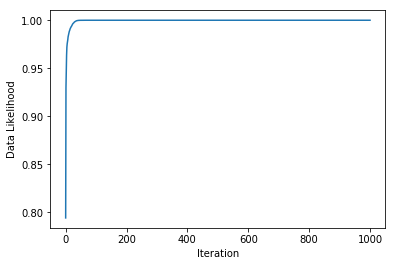

In [63]:
Xtrain,Ttrain,Xtest,Ttest = ml.partition(Xanuran,Tanuran,(0.8,0.2),classification=True) 
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1],80,len(np.unique(Tanuran)))
nnet.train(Xtrain,Ttrain,nIterations=1000, verbose=False)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');
print("Confusion Matrix on Test Data.\n")
cm = ml.confusionMatrix(Ttest,Ptest,np.unique(Ttest))
print("\nConfusion Matrix on Train Data.")
cm = ml.confusionMatrix(Ttrain,Ptrain,np.unique(Ttrain))

Out of 10 hidden layer used, 80 gave the best result so it was used. Since the number of incorrect test is lower so higher values were not explored for hidden layer.Also the test data is classified better.

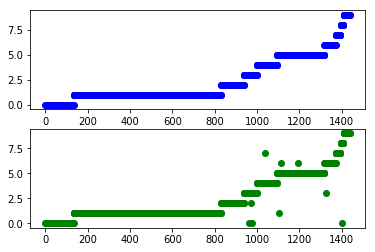

In [65]:
plt.subplot(2,1,1);
plt.plot(Ttest, 'bo');
plt.subplot(2,1,2);
plt.plot(Ptest, 'go');

The graph of the data predicted is better as seen in the figure above.

## Grading

Download [A6grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A6grader.tar) and extract `A6grader.py` from it.

In [74]:
%run -i "A6grader.py"


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.2999999999999998, 6.3999999999999995, 0.6]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

--- 20/20 points. You correctly found that network [20, 20] is best.

notebook Execution Grade is 60/60

======================= The regression data set =======================

--- _/5 points. Read the data in energydata_complete.csv into variables Xenergy and Tenergy.

--- _/5 points. Train some networks by c